In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('kalpsayisal.csv', sep=';')
dataset.head()

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140,289,1,1,172,2,3,Yok
1,49,1,2,160,180,1,1,156,2,2,Var
2,37,2,3,130,283,1,2,98,2,3,Yok
3,48,1,1,138,214,1,1,108,1,2,Var
4,54,2,2,150,195,1,1,122,2,3,Yok


In [2]:
degistir={'Yok': 1 , 'Var': 2}
dataset['Kalp_hasta'] = dataset['Kalp_hasta'].map(degistir) #nominal değerleri nümeric yaptı

In [3]:
X=dataset.iloc[:,:10]
y=dataset.iloc[:,-1]

In [4]:
X

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi
0,40,2,3,140,289,1,1,172,2,3
1,49,1,2,160,180,1,1,156,2,2
2,37,2,3,130,283,1,2,98,2,3
3,48,1,1,138,214,1,1,108,1,2
4,54,2,2,150,195,1,1,122,2,3
...,...,...,...,...,...,...,...,...,...,...
913,45,2,4,110,264,1,1,132,2,2
914,68,2,1,144,193,2,1,141,2,2
915,57,2,1,130,131,1,1,115,1,2
916,57,1,3,130,236,1,3,174,2,2


In [5]:
y

0      1
1      2
2      1
3      2
4      1
      ..
913    2
914    2
915    2
916    2
917    1
Name: Kalp_hasta, Length: 918, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
from sklearn.naive_bayes import GaussianNB   
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 83.69565217391305


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[68  9]
 [21 86]]


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.88      0.82        77
           2       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



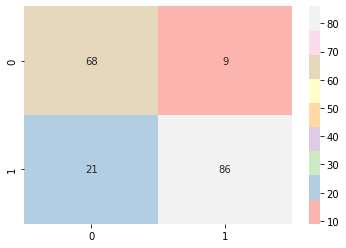

In [10]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Pastel1)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test,y_pred)))

MAE:  0.16304347826086957
RMSE:  0.4037864265436241


In [12]:
import numpy as np
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)*100

67.80248894030024

In [13]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.6721700914597933

In [14]:
from sklearn.metrics import roc_auc_score
print("roc:",metrics.roc_auc_score(y_test,y_pred))

roc: 0.8434276004369461


In [15]:
from sklearn.metrics import precision_score
print("precision", metrics.precision_score(y_test,y_pred))

precision 0.7640449438202247


In [16]:
from sklearn import metrics
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f ölçütü",metrics.f1_score(y_test,y_pred))

Precision: 0.7640449438202247
Recall: 0.8831168831168831
f ölçütü 0.8192771084337349


In [18]:
dataset.st_segmentinin_egimi

0      3
1      2
2      3
3      2
4      3
      ..
913    2
914    2
915    2
916    2
917    3
Name: st_segmentinin_egimi, Length: 918, dtype: int64

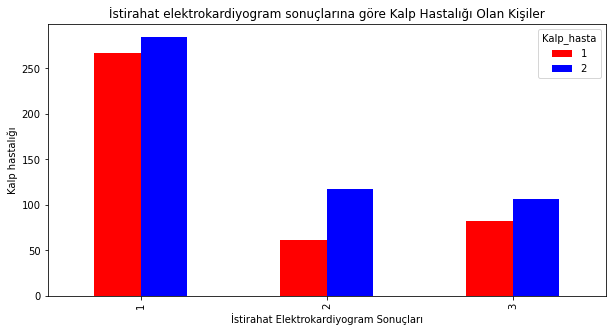

In [19]:
pd.crosstab(dataset.Istirahat_elektrokardiyogram_sonuclari,dataset.Kalp_hasta).plot(kind="bar",figsize=(10,5),color=['Red','Blue' ])
plt.title('İstirahat elektrokardiyogram sonuçlarına göre Kalp Hastalığı Olan Kişiler')

plt.xlabel('İstirahat Elektrokardiyogram Sonuçları')
plt.ylabel('Kalp hastalığı')
plt.show()

In [20]:
dataset.groupby('Kalp_hasta').mean()

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi
Kalp_hasta,,,,,,,,,,
1,50.551220,1.651220,2.236585,130.180488,227.463415,1.107317,1.548780,148.151220,1.865854,2.739024
2,55.899606,1.901575,1.354331,134.198819,178.035433,1.334646,1.647638,127.655512,1.377953,2.057087


In [21]:
y.value_counts()

2    508
1    410
Name: Kalp_hasta, dtype: int64

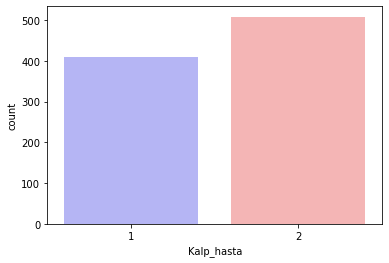

In [22]:
sns.countplot(x="Kalp_hasta", data=dataset, palette="bwr")
plt.show()